In [35]:
import pandas as pd

In [36]:
data=pd.read_csv('Reviews.csv')

In [37]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [38]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [40]:
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [41]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [42]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [43]:
value_count=data['Liked'].value_counts()

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

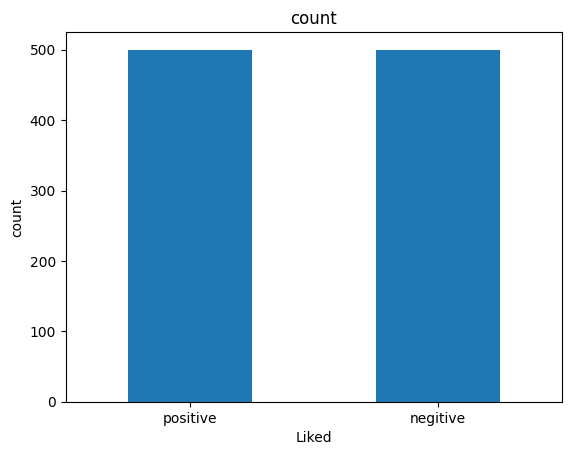

In [45]:
value_count.plot(kind='bar')
plt.title(value_count.name)
plt.xlabel(value_count.index.name )
plt.ylabel(value_count.name)
plt.xticks(ticks=[0,1] , labels=['positive','negitive'], rotation=False)
plt.show()

In [46]:
from wordcloud import WordCloud # for text data

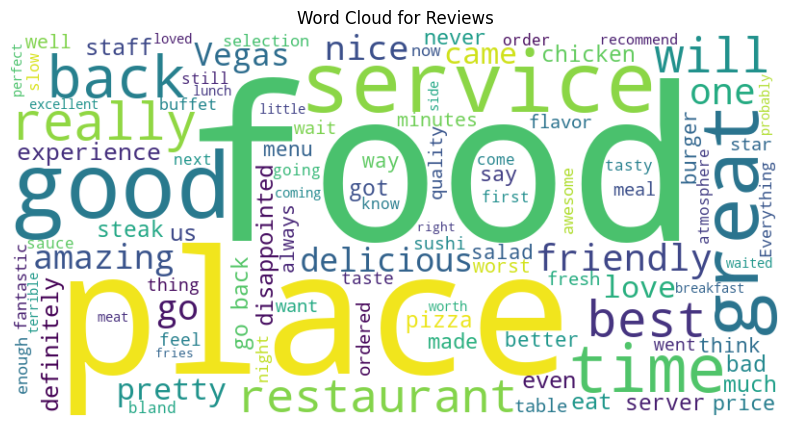

In [47]:
from wordcloud import WordCloud # for text data
combined_text=' '.join(data['Review'])
wordcloud=WordCloud(width=800, height=400, background_color='white', max_words=100).generate(combined_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

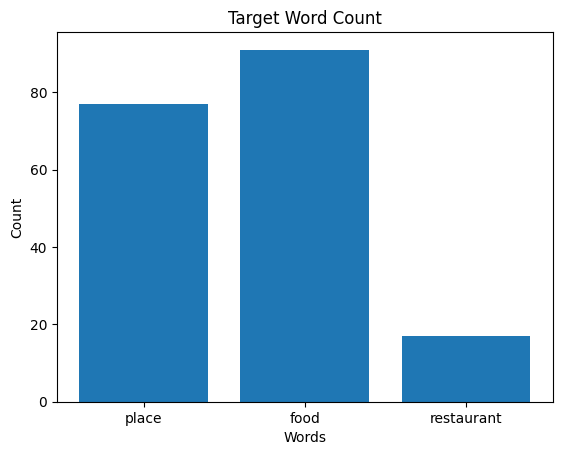

In [48]:
from collections import Counter
target=['food','place','restaurant']
all_words=" ".join(data['Review']).lower().split()
words=Counter(all_words)
target_woed_count={word:words[word] for word in words if word in target}
plt.bar(target_woed_count.keys(), target_woed_count.values())
plt.title('Target Word Count')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

# text pre processing

In [49]:
# convert data to the lower case
lowercased_text=data['Review'].str.lower()

In [50]:
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [51]:
# tokenization

from nltk.tokenize import word_tokenize
#tokenized_text=lowercased_text.apply(word_tokenize)


In [52]:
import nltk
nltk.download('punkt')
data['tokens']=data['Review'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91800\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [53]:
data['tokens']

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: tokens, Length: 1000, dtype: object

In [54]:
# remove punctuation

import string
#punctuation=string.punctuation
data['Review']=data['Review'].str.replace(f'[{string.punctuation}]',' ', regex=True)

In [55]:
data['Review'].value_counts()

Review
 NAME                                                                                                                                     4
I would not recommend this place                                                                                                          2
I love this place                                                                                                                         2
I won t be back                                                                                                                           2
Will not be back                                                                                                                          2
                                                                                                                                         ..
The burger    I got the  Gold Standard  a  17 burger and was kind of disappointed                                                         1
OMG  the food

In [56]:
# remove stop force(parts of speech)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
data['Tokens']=data['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91800\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [57]:
data['Tokens']

0                                        Wow Loved place
1                                             Crust good
2                                Not tasty texture nasty
3      Stopped late May bank holiday Rick Steve recom...
4                        The selection menu great prices
                             ...                        
995                  I think food flavor texture lacking
996                              Appetite instantly gone
997                    Overall I impressed would go back
998    The whole experience underwhelming I think go ...
999    Then I wasted enough life poured salt wound dr...
Name: Tokens, Length: 1000, dtype: object

In [58]:
# stemming( it is the process of reducing the word into root to base word by removing the sufix.)
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer=PorterStemmer()
data['stemmed']=data['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))


In [59]:
data['stemmed']

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object

In [60]:
# lemmaization(it transform the root word to dict word)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91800\AppData\Roaming\nltk_data...


True

In [61]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
lemmatizer=WordNetLemmatizer()
data['lemma']=data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word , pos=wordnet.VERB) for word in word_tokenize(x)]))

In [62]:
data

,Review,Liked,tokens,Tokens,stemmed,lemma
0,Wow Loved this place,1,"[Wow, ..., Loved, this, place, .]",Wow Loved place,wow love thi place,Wow Loved this place
1,Crust is not good,0,"[Crust, is, not, good, .]",Crust good,crust is not good,Crust be not good
2,Not tasty and the texture was just nasty,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty texture nasty,not tasti and the textur wa just nasti,Not tasty and the texture be just nasty
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped late May bank holiday Rick Steve recom...,stop by dure the late may bank holiday off ric...,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection menu great prices,the select on the menu wa great and so were th...,The selection on the menu be great and so be t...
...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...",I think food flavor texture lacking,i think food should have flavor and textur and...,I think food should have flavor and texture an...
996,Appetite instantly gone,0,"[Appetite, instantly, gone, .]",Appetite instantly gone,appetit instantli gone,Appetite instantly go
997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...",Overall I impressed would go back,overal i wa not impress and would not go back,Overall I be not impress and would not go back
998,The whole experience was underwhelming and I ...,0,"[The, whole, experience, was, underwhelming, ,...",The whole experience underwhelming I think go ...,the whole experi wa underwhelm and i think we ...,The whole experience be underwhelming and I th...


In [63]:
import re
data['no_numbers']=data['Review'].apply(lambda x: re.sub(r'\d+', '', x))

In [64]:
data

,Review,Liked,tokens,Tokens,stemmed,lemma,no_numbers
0,Wow Loved this place,1,"[Wow, ..., Loved, this, place, .]",Wow Loved place,wow love thi place,Wow Loved this place,Wow Loved this place
1,Crust is not good,0,"[Crust, is, not, good, .]",Crust good,crust is not good,Crust be not good,Crust is not good
2,Not tasty and the texture was just nasty,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty texture nasty,not tasti and the textur wa just nasti,Not tasty and the texture be just nasty,Not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped late May bank holiday Rick Steve recom...,stop by dure the late may bank holiday off ric...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection menu great prices,the select on the menu wa great and so were th...,The selection on the menu be great and so be t...,The selection on the menu was great and so wer...
...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...",I think food flavor texture lacking,i think food should have flavor and textur and...,I think food should have flavor and texture an...,I think food should have flavor and texture an...
996,Appetite instantly gone,0,"[Appetite, instantly, gone, .]",Appetite instantly gone,appetit instantli gone,Appetite instantly go,Appetite instantly gone
997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...",Overall I impressed would go back,overal i wa not impress and would not go back,Overall I be not impress and would not go back,Overall I was not impressed and would not go b...
998,The whole experience was underwhelming and I ...,0,"[The, whole, experience, was, underwhelming, ,...",The whole experience underwhelming I think go ...,the whole experi wa underwhelm and i think we ...,The whole experience be underwhelming and I th...,The whole experience was underwhelming and I ...


In [65]:
# remove the special characters
data['cleaned']=data['Review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [66]:
data

,Review,Liked,tokens,Tokens,stemmed,lemma,no_numbers,cleaned
0,Wow Loved this place,1,"[Wow, ..., Loved, this, place, .]",Wow Loved place,wow love thi place,Wow Loved this place,Wow Loved this place,Wow Loved this place
1,Crust is not good,0,"[Crust, is, not, good, .]",Crust good,crust is not good,Crust be not good,Crust is not good,Crust is not good
2,Not tasty and the texture was just nasty,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty texture nasty,not tasti and the textur wa just nasti,Not tasty and the texture be just nasty,Not tasty and the texture was just nasty,Not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped late May bank holiday Rick Steve recom...,stop by dure the late may bank holiday off ric...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection menu great prices,the select on the menu wa great and so were th...,The selection on the menu be great and so be t...,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...
...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...",I think food flavor texture lacking,i think food should have flavor and textur and...,I think food should have flavor and texture an...,I think food should have flavor and texture an...,I think food should have flavor and texture an...
996,Appetite instantly gone,0,"[Appetite, instantly, gone, .]",Appetite instantly gone,appetit instantli gone,Appetite instantly go,Appetite instantly gone,Appetite instantly gone
997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...",Overall I impressed would go back,overal i wa not impress and would not go back,Overall I be not impress and would not go back,Overall I was not impressed and would not go b...,Overall I was not impressed and would not go b...
998,The whole experience was underwhelming and I ...,0,"[The, whole, experience, was, underwhelming, ,...",The whole experience underwhelming I think go ...,the whole experi wa underwhelm and i think we ...,The whole experience be underwhelming and I th...,The whole experience was underwhelming and I ...,The whole experience was underwhelming and I ...


In [67]:
!pip install contractions

   ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/289.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------- ----------- 204.8/289.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 289.9/289.9 kB 2.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\91800\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [68]:
import contractions
data['expanded']=data['Review'].apply(contractions.fix)



In [69]:
!pip install emoji

   ---------------------------------------- 0.0/431.4 kB ? eta -:--:--
    --------------------------------------- 10.2/431.4 kB ? eta -:--:--
   -- ------------------------------------ 30.7/431.4 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 81.9/431.4 kB 770.8 kB/s eta 0:00:01
   -------------------- ------------------- 225.3/431.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 431.4/431.4 kB 2.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\91800\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [70]:
# remove emojis
import emoji
data['emoji_removed']=data['Review'].apply(emoji.demojize)

In [71]:
# removing the links
! pip install beautifulsoup4


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\91800\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [72]:
from bs4 import BeautifulSoup
data['no_links']=data['Review'].apply(lambda x: BeautifulSoup(x).get_text())

In [73]:
data

,Review,Liked,tokens,Tokens,stemmed,lemma,no_numbers,cleaned,expanded,emoji_removed,no_links
0,Wow Loved this place,1,"[Wow, ..., Loved, this, place, .]",Wow Loved place,wow love thi place,Wow Loved this place,Wow Loved this place,Wow Loved this place,Wow Loved this place,Wow Loved this place,Wow Loved this place
1,Crust is not good,0,"[Crust, is, not, good, .]",Crust good,crust is not good,Crust be not good,Crust is not good,Crust is not good,Crust is not good,Crust is not good,Crust is not good
2,Not tasty and the texture was just nasty,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty texture nasty,not tasti and the textur wa just nasti,Not tasty and the texture be just nasty,Not tasty and the texture was just nasty,Not tasty and the texture was just nasty,Not tasty and the texture was just nasty,Not tasty and the texture was just nasty,Not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped late May bank holiday Rick Steve recom...,stop by dure the late may bank holiday off ric...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection menu great prices,the select on the menu wa great and so were th...,The selection on the menu be great and so be t...,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...
...,...,...,...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...",I think food flavor texture lacking,i think food should have flavor and textur and...,I think food should have flavor and texture an...,I think food should have flavor and texture an...,I think food should have flavor and texture an...,I think food should have flavor and texture an...,I think food should have flavor and texture an...,I think food should have flavor and texture an...
996,Appetite instantly gone,0,"[Appetite, instantly, gone, .]",Appetite instantly gone,appetit instantli gone,Appetite instantly go,Appetite instantly gone,Appetite instantly gone,Appetite instantly gone,Appetite instantly gone,Appetite instantly gone
997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...",Overall I impressed would go back,overal i wa not impress and would not go back,Overall I be not impress and would not go back,Overall I was not impressed and would not go b...,Overall I was not impressed and would not go b...,Overall I was not impressed and would not go b...,Overall I was not impressed and would not go b...,Overall I was not impressed and would not go b...
998,The whole experience was underwhelming and I ...,0,"[The, whole, experience, was, underwhelming, ,...",The whole experience underwhelming I think go ...,the whole experi wa underwhelm and i think we ...,The whole experience be underwhelming and I th...,The whole experience was underwhelming and I ...,The whole experience was underwhelming and I ...,The whole experience was underwhelming and I ...,The whole experience was underwhelming and I ...,The whole experience was underwhelming and I ...


In [74]:
# TF IDF vectorizer term frequencies and inverse data frequency
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer()
matrix=tfidf_vectorizer.fit_transform(data['Review'])

In [75]:
matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
# building a machine learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [77]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['Review'])
y=data['Liked']

In [78]:
x_train , x_test , y_train , y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [79]:
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [80]:
y_pred=model.predict(x_test)


In [81]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [82]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1], dtype=int64)

In [83]:
model.score(x_test,y_test)

0.8

In [84]:
accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [85]:
print(f'report {report}')

report               precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [86]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(f'confusion matrix {cm}')

confusion matrix [[82 14]
 [26 78]]


In [87]:
# predection of new data point
def preprocess_review(review):
    review=review.lower()
    review=BeautifulSoup(review, "html.parser").get_text()
    review=re.sub(r'[^a-zA-Z0-9\s]', '', review)
    review=contractions.fix(review)
    review=emoji.demojize(review)
    tokens=word_tokenize(review)
    stop_words=set(stopwords.words('english'))
    tokens=[word for word in tokens if word not in stop_words]
    stemmer=PorterStemmer()
    stemmed_tokens=[stemmer.stem(word) for word in tokens]
    lemmatizer=WordNetLemmatizer()
    lemmatized_tokens=[lemmatizer.lemmatize(word, pos='v') for word in stemmed_tokens]
    review=' '.join(lemmatized_tokens)
    return review


In [88]:
new_review=input("enter your review")
new_review=preprocess_review(new_review)
new_review_vectorized=vectorizer.transform([new_review])
print(new_review)
prediction=model.predict(new_review_vectorized)
if prediction[0]==1:
  print("positive")
else:
  print("negative")


negative
